In [1]:
import numpy as np
from numpy import random as rnd
from matplotlib import pyplot as plt
import datetime,os,warnings,csv

import torch
from torch import functional as F
from torch import optim
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor

import astropy.units as u
from astropy.io import fits
from astropy.utils.data import download_file,get_pkg_data_contents,get_pkg_data_filename
from spectral_cube import SpectralCube

from bs4 import BeautifulSoup
import requests

In [1]:
from astroquery.esasky import ESASky
from astroquery.gaia import Gaia

In [3]:
esa_catalog = ESASky.list_catalogs()
esa_maps = ESASky.list_maps()

In [4]:
print(esa_catalog)

['LAMOST', 'AllWise', 'AKARI-IRC-SC', 'TwoMASS', 'INTEGRAL', 'CHANDRA-SC2', 'XMM-EPIC-STACK', 'XMM-EPIC', 'XMM-OM', 'XMM-SLEW', 'Tycho-2', 'Gaia-eDR3', 'Hipparcos-2', 'HSC', 'Herschel-HPPSC-070', 'Herschel-HPPSC-100', 'Herschel-HPPSC-160', 'Herschel-SPSC-250', 'Herschel-SPSC-350', 'Herschel-SPSC-500', 'Planck-PGCC', 'Planck-PCCS2E-HFI', 'Planck-PCCS2-HFI', 'Planck-PCCS2-LFI', 'Planck-PSZ2']


In [6]:
result = ESASky.query_object_catalogs("M51", "HSC")

In [8]:
print(result)

TableList with 1 tables:
	'0:HSC' with 9 column(s) and 230 row(s) 


In [11]:
images = ESASky.get_images("m51", radius="20 arcmin",missions=['Herschel', 'ISO-IR'])

INFO: Starting download of HERSCHEL data. (25 files) [astroquery.esasky.core]
INFO: Downloading Observation ID: 1342188329 from http://archives.esac.esa.int/hsa/whsa-tap-server/data?RETRIEVAL_TYPE=STANDALONE&observation_oid=8637834&DATA_RETRIEVAL_ORIGIN=UI [astroquery.esasky.core]
INFO: [Done] [astroquery.esasky.core]
INFO: Downloading Observation ID: 1342248041 from http://archives.esac.esa.int/hsa/whsa-tap-server/data?RETRIEVAL_TYPE=STANDALONE&observation_oid=8605750&DATA_RETRIEVAL_ORIGIN=UI [astroquery.esasky.core]
INFO: [Done] [astroquery.esasky.core]
INFO: Downloading Observation ID: 1342232463 from http://archives.esac.esa.int/hsa/whsa-tap-server/data?RETRIEVAL_TYPE=STANDALONE&observation_oid=8638400&DATA_RETRIEVAL_ORIGIN=UI [astroquery.esasky.core]
INFO: [Done] [astroquery.esasky.core]
INFO: Downloading Observation ID: 1342248040 from http://archives.esac.esa.int/hsa/whsa-tap-server/data?RETRIEVAL_TYPE=STANDALONE&observation_oid=8605714&DATA_RETRIEVAL_ORIGIN=UI [astroquery.esask

INFO: [Done] [astroquery.esasky.core]
INFO: Downloading Observation ID: 1342224973 from http://archives.esac.esa.int/hsa/whsa-tap-server/data?RETRIEVAL_TYPE=STANDALONE&observation_oid=8612038&DATA_RETRIEVAL_ORIGIN=UI [astroquery.esasky.core]
INFO: [Done] [astroquery.esasky.core]
INFO: Downloading Observation ID: 1342234914 from http://archives.esac.esa.int/hsa/whsa-tap-server/data?RETRIEVAL_TYPE=STANDALONE&observation_oid=8612056&DATA_RETRIEVAL_ORIGIN=UI [astroquery.esasky.core]
INFO: [Done] [astroquery.esasky.core]
INFO: Downloading Observation ID: 1342223511 from http://archives.esac.esa.int/hsa/whsa-tap-server/data?RETRIEVAL_TYPE=STANDALONE&observation_oid=8605351&DATA_RETRIEVAL_ORIGIN=UI [astroquery.esasky.core]
INFO: [Done] [astroquery.esasky.core]
INFO: Downloading Observation ID: 1342247978 from http://archives.esac.esa.int/hsa/whsa-tap-server/data?RETRIEVAL_TYPE=STANDALONE&observation_oid=8612102&DATA_RETRIEVAL_ORIGIN=UI [astroquery.esasky.core]
INFO: [Done] [astroquery.esasky.

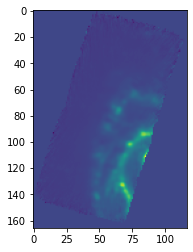

In [49]:
plt.imshow(images['HERSCHEL'][1]['160']['image'].data)

In [96]:
images['ISO-IR'][0]['PRIMARY'].data

array([[0.01692273, 0.01703842, 0.01729523, ..., 0.01416642, 0.01751785,
        0.02029456],
       [0.01483864, 0.0159703 , 0.01746106, ..., 0.01078283, 0.01578332,
        0.01909986],
       [0.01335396, 0.0156126 , 0.01671222, ..., 0.01142324, 0.01405359,
        0.01506078],
       ...,
       [0.01959801, 0.01642263, 0.01142672, ..., 0.01569305, 0.01389864,
        0.01407275],
       [0.01594184, 0.0138437 , 0.01143135, ..., 0.01326721, 0.0125174 ,
        0.01247009],
       [0.01049103, 0.01163198, 0.01223376, ..., 0.01194505, 0.01217984,
        0.01136438]], dtype=float32)

In [93]:
img = images['ISO-IR'][0]['PRIMARY'].data#images['ISO-IR'][1]['70']['image'].data
img -= img.min()
img *= (1/img.max())

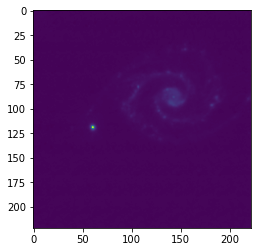

In [94]:
plt.imshow(img)
plt.show()